In [198]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import jit
import random as random

In [359]:
phi = np.zeros([20,150])

In [360]:
phi

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [349]:
for i in range(10):
    phi[random.randrange(0,20),random.randrange(0,10)] = -1

In [361]:
phi[9,110:120] = 1
phi[11,110:120] = 1
phi[7,60:90] = 1
phi[13,60:90] = 1
#phi[0:-1][0] = -1

In [307]:
@jit(nopython=True)
def laplace_eq(M):
    for n in range(150):
        for j in range(len(M[0,:])-1):
            for i in range(len(M[:,0])-1):
                if M[i][j] == 1:
                    pass
                elif M[i][j] ==-1:
                    pass
                else:
                    M[i,j] = 1/4 * (M[i-1][j] + M[i+1][j] + M[i][j-1] + M[i][j+1])
    return M

In [362]:
start_time = time.time()
phi = laplace_eq(phi)
phi[8:13,60:90] = 0
print(time.time() - start_time)

0.001993417739868164


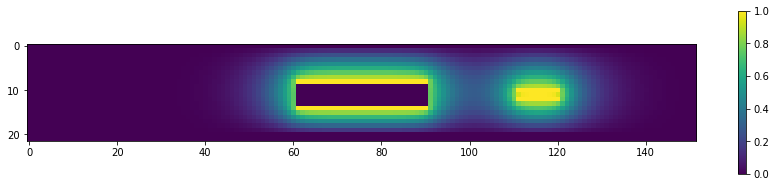

In [369]:
fig, ax = plt.subplots(figsize=(15,10))
pos = plt.imshow(np.pad(phi, ((1,1),(1,1)), 'constant'))
fig.colorbar(pos, ax=ax, shrink = 0.3)

In [222]:
0.002*100*1000

200.0

In [233]:
prob = (phi[3:6,69:72]/np.sum(phi[3:6,69:72])).ravel()

In [332]:
prob = (phi[4:7,4:7]+1)/np.sum(phi[4:7,4:7]+1)
prob

array([[0.14477407, 0.11247811, 0.14014479],
       [0.11251958, 0.        , 0.10742971],
       [0.14025175, 0.10749978, 0.13490221]])

In [258]:
np.random.choice(9,1,p= prob)

array([4])

In [343]:
position = random.randrange(0,20), random.randrange(6,10)
i, j = position[0], position[1]

In [358]:
np.random.choice(9,1,p=((phi[i-1:i+2,j-1:j+2])/np.sum(phi[i-1:i+2,j-1:j+2])).ravel())

ValueError: 'a' and 'p' must have same size

In [365]:
np.exp(-phi[i-1:i+2,j-1:j+2])/np.sum(np.exp(phi[i-1:i+2,j-1:j+2]))

array([[0.11111111, 0.11111111, 0.1111111 ],
       [0.11111111, 0.1111111 , 0.1111111 ],
       [0.11111111, 0.1111111 , 0.1111111 ]])

In [375]:
position = random.randrange(1,6), random.randrange(60,90)
i, j = position[0], position[1]
i = 2
for n in range(20):
    choice = np.random.choice(9,1,p=(np.exp(phi[i-1:i+2,j-1:j+2])/np.sum(np.exp(phi[i-1:i+2,j-1:j+2]))).ravel())
    if choice == 0:
        i -= 1
        j -= 1
    elif choice == 1:
        i -= 1
    elif choice == 2:
        i -= 1
        j += 1
    elif choice == 3:
        j -= 1
    elif choice == 4:
        pass
    elif choice == 5:
        j += 1
    elif choice == 6:
        i += 1
        j -= 1
    elif choice == 7:
        i += 1
    elif choice == 8:
        i += 1
        j += 1
    print(i,j)

2 69
3 68
3 68
2 68
2 69
2 68
2 69
3 68
2 68
2 67
3 68
4 68
4 68
3 69
2 69
1 70
2 69
3 68
3 67
2 67


In [367]:
i,j

(4, 7)

In [277]:
position

(8, 3)